In [1]:
import json
from pathlib import Path

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import hashlib
import re
def remove_whitespaces(s: str):
    return re.sub(r'\s+', '', s)

sns.set_context("paper", font_scale=3)
sns.set_palette("deep")
color_palette = sns.color_palette()
color_palette
DATE='0527'

In [2]:
# const GLenum POINTS                         = 0x0000;
# const GLenum LINES                          = 0x0001;
# const GLenum LINE_LOOP                      = 0x0002;
# const GLenum LINE_STRIP                     = 0x0003;
# const GLenum TRIANGLES                      = 0x0004;
# const GLenum TRIANGLE_STRIP                 = 0x0005;
# const GLenum TRIANGLE_FAN                   = 0x0006;
gl_types = {
    0: "POINTS",
    1: "LINES",
    2: "LINE_LOOP",
    3: "LINE_STRIP",
    4: "TRIANGLES",
    5: "TRIANGLE_STRIP",
    6: "TRIANGLE_FAN",
}

In [3]:
# df_frame = pd.read_pickle('imr/0501-df_frame-raf.pkl.zst', compression='zstd')
# df_context = pd.read_pickle('imr/0501-df_context.pkl.zst', compression='zstd')
df_context_noraf = pd.read_pickle('imr/0527-df_context-noraf.pkl.zst', compression='zstd')
df_context_noraf = df_context_noraf[df_context_noraf['label_ERROR'].isna() | (df_context_noraf['label_ERROR'] == 0)]
# df_shader = pd.read_pickle('imr/0501-df_shader-noraf.pkl.zst', compression='zstd')

In [4]:
df_context_noraf.columns.to_list()

['idx-frame',
 'idx',
 'category',
 'label_ERROR',
 'label_usecase',
 'label_interactions',
 'label_comments',
 'url',
 'date',
 'netIdleTimeout',
 'raf_path',
 'manual_interaction',
 'url_essential',
 'frame.url',
 'frame.title',
 'frame.date',
 'frame.when',
 'frame.counter.frames',
 'frame.counter.contextsNum',
 'frame.counter.usedWebGL',
 'frame.counter.usedOffScreenCanvas',
 'frame.context.canvasSize',
 'frame.context.canvasHidden',
 'frame.context.canvasContained',
 'frame.context.maghsk.createTime',
 'frame.context.maghsk.createArguments.0',
 'frame.context.maghsk.createArguments.1.alpha',
 'frame.context.maghsk.createArguments.1.depth',
 'frame.context.maghsk.createArguments.1.stencil',
 'frame.context.maghsk.createArguments.1.antialias',
 'frame.context.maghsk.createArguments.1.premultipliedAlpha',
 'frame.context.maghsk.createArguments.1.preserveDrawingBuffer',
 'frame.context.maghsk.createArguments.1.powerPreference',
 'frame.context.maghsk.createArguments.1.failIfMajorPerfo

In [5]:
df_context_noraf['frame.counter.usedWebGL'].isna().sum()

0

In [6]:
df_context_noraf['url'].nunique()

15651

In [7]:
df_context_noraf.shape

(34204, 363)

In [8]:
# print("Frame shape:", df_frame.shape)
print("Context shape:", df_context_noraf.shape)

Context shape: (34204, 363)


In [9]:
def url_essential(x):
    if x.startswith('http://'):
        x = x[7:]
    if x.startswith('https://'):
        x = x[8:]
    return x.strip('/')

In [10]:
func_count_list = [x for x in df_context_noraf.columns.to_list() if x.startswith('frame.context.maghsk.counter.funcCount.')]
func_count_list

['frame.context.maghsk.counter.funcCount.getShaderPrecisionFormat',
 'frame.context.maghsk.counter.funcCount.getParameter',
 'frame.context.maghsk.counter.funcCount.getExtension',
 'frame.context.maghsk.counter.funcCount.createTexture',
 'frame.context.maghsk.counter.funcCount.bindTexture',
 'frame.context.maghsk.counter.funcCount.texParameteri',
 'frame.context.maghsk.counter.funcCount.texImage2D',
 'frame.context.maghsk.counter.funcCount.texImage3D',
 'frame.context.maghsk.counter.funcCount.clearColor',
 'frame.context.maghsk.counter.funcCount.clearDepth',
 'frame.context.maghsk.counter.funcCount.clearStencil',
 'frame.context.maghsk.counter.funcCount.enable',
 'frame.context.maghsk.counter.funcCount.depthFunc',
 'frame.context.maghsk.counter.funcCount.frontFace',
 'frame.context.maghsk.counter.funcCount.cullFace',
 'frame.context.maghsk.counter.funcCount.getContextAttributes',
 'frame.context.maghsk.counter.funcCount.viewport',
 'frame.context.maghsk.counter.funcCount.createBuffer',

In [11]:
df_context_noraf

,idx-frame,idx,category,label_ERROR,label_usecase,label_interactions,label_comments,url,date,netIdleTimeout,...,frame.context.maghsk.counter.funcCount.clearBufferfi,frame.context.maghsk.counter.textureTypes.DataView,frame.context.maghsk.createArguments.1.referrer,frame.context.maghsk.createArguments.1.useWebgl2,frame.context.maghsk.counter.textureTypes.,frame.context.maghsk.createArguments.1.dpi,frame.context.maghsk.createArguments.1.clearColor,frame.context.maghsk.counter.funcCount.getAttachedShaders,frame.context.maghsk.createArguments.1.adaptToDeviceRatio,frame.context.maghsk.createArguments.1.dnt
0,0,0,[bq],0,1,0,,http://0ldsk00l.ca/,1683354276886,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,[bq],0,3,0,,http://1000000-lives.com/,1683354282774,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,[bq],0,3,0,,http://1000000-lives.com/,1683354282774,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,2,[bq],0,3,0,,http://1000000-lives.com/,1683354282774,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,2,[bq],0,3,0,,http://1000000-lives.com/,1683354282774,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35031,114205,29224,[bq],0,1,0,,https://zurstrass.com/,1683423145038,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35032,114217,29230,[bq],0,1,0,,https://zycieczestochowy.pl/wydanie-9-05-2022/,1683422963723,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35033,114217,29230,[bq],0,1,0,,https://zycieczestochowy.pl/wydanie-9-05-2022/,1683422963723,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35034,114225,29235,[bq],0,1,0,,https://ggk.kz/,1683423178451,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_context_noraf.duplicated(subset='idx', keep='first')

0        False
1        False
2         True
3         True
4         True
         ...  
35031     True
35032    False
35033     True
35034    False
35035    False
Length: 34204, dtype: bool

In [13]:
# # tmp = df_context_noraf
# tmp = df_context_noraf.duplicated(subset='idx', keep='first')
# tmp = tmp[tmp['frame.url'].map(lambda x: url_essential(x.strip())) != tmp['url'].map(lambda x: url_essential(x.strip()))]
# tmp[tmp[func_count_list].sum(axis=1) > 100][['url', 'frame.url']]

In [14]:
df_context_noraf = df_context_noraf[df_context_noraf[func_count_list].sum(axis=1) > 0]
print("U_w =", df_context_noraf.idx.nunique())
print("F_w =", df_context_noraf['idx-frame'].nunique())
print("C_w =", len(df_context_noraf))
df_context_noraf

U_w = 12092
F_w = 14622
C_w = 26822


,idx-frame,idx,category,label_ERROR,label_usecase,label_interactions,label_comments,url,date,netIdleTimeout,...,frame.context.maghsk.counter.funcCount.clearBufferfi,frame.context.maghsk.counter.textureTypes.DataView,frame.context.maghsk.createArguments.1.referrer,frame.context.maghsk.createArguments.1.useWebgl2,frame.context.maghsk.counter.textureTypes.,frame.context.maghsk.createArguments.1.dpi,frame.context.maghsk.createArguments.1.clearColor,frame.context.maghsk.counter.funcCount.getAttachedShaders,frame.context.maghsk.createArguments.1.adaptToDeviceRatio,frame.context.maghsk.createArguments.1.dnt
0,0,0,[bq],0,1,0,,http://0ldsk00l.ca/,1683354276886,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,[bq],0,3,0,,http://1000000-lives.com/,1683354282774,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,[bq],0,3,0,,http://1000000-lives.com/,1683354282774,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,2,[bq],0,3,0,,http://1000000-lives.com/,1683354282774,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,2,[bq],0,3,0,,http://1000000-lives.com/,1683354282774,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35031,114205,29224,[bq],0,1,0,,https://zurstrass.com/,1683423145038,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35032,114217,29230,[bq],0,1,0,,https://zycieczestochowy.pl/wydanie-9-05-2022/,1683422963723,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35033,114217,29230,[bq],0,1,0,,https://zycieczestochowy.pl/wydanie-9-05-2022/,1683422963723,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35034,114225,29235,[bq],0,1,0,,https://ggk.kz/,1683423178451,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Drawed Contexts

In [15]:
draw_commands=[
    'frame.context.maghsk.counter.funcCount.drawArrays',
    'frame.context.maghsk.counter.funcCount.drawElements',
    'frame.context.maghsk.counter.funcCount.drawBuffers',
    'frame.context.maghsk.counter.funcCount.drawElementsInstanced',
    'frame.context.maghsk.counter.funcCount.drawArraysInstanced',
    # 'frame.context.maghsk.counter.funcCount.drawRangeElements',
]
# df_context_noraf = df_context_noraf[df_context_noraf[func_count_list].sum(axis=1) > 0]

In [16]:
set(df_context_noraf[df_context_noraf[func_count_list].sum(axis=1) > 0].url.tolist()) - set(df_context_noraf[df_context_noraf[draw_commands].sum(axis=1) > 0].url.tolist())

{'https://epidemia-koronawirus.pl/',
 'http://cmburl.cn',
 'http://www.docarmoimobiliaria.com.br/i/terreno/duque-de-caxias/315554',
 'https://www.goldener-pflug-chiemsee.de/',
 'https://www.illaghetto.it/',
 'https://www.maritimeparc.com/',
 'https://www.cisp.gov.ao:10443/',
 'https://724insurgentes-sur.com/',
 'https://biancardignc.com.ar/precios-de-equipos-de-gnc/',
 'https://plasticosflorida.com.ar/',
 'https://codepen.io/teropa/pen/rdoPbG',
 'https://proespecies.eco.br/',
 'http://custom.parkpre.it/',
 'https://openlive3d.com/',
 'http://magazine.montana-cans.com/',
 'https://crayheadwear.en.alibaba.com/',
 'https://bancdeterres.cat/',
 'https://yourchoice.to/',
 'https://www.volati.se/sv/investerare/arsredovisning-2021-2.aspx',
 'https://lewisandclarkrafting.com/',
 'https://coverdog.orvis.com/vote/',
 'https://zjtctoy.en.alibaba.com/',
 'https://fijikids.ru/',
 'https://www.schmidtabrasiveblasting.com/',
 'https://furnotelshinelong.en.alibaba.com/',
 'https://b-s.ae/',
 'https://

In [17]:
df_context_noraf[df_context_noraf['url'] == 'https://www.henzensport.ch/'].to_csv('tmp.csv')

In [18]:
# df_context_noraf = df_context_noraf[df_context_noraf[draw_commands].sum(axis=1) > 0]

In [19]:
df_context_noraf.to_pickle(f'imr/{DATE}-draw_df_context_noraf.pkl.zst', compression='zstd')

In [20]:
df_context_noraf['label_usecase'].value_counts()

label_usecase
1    22407
3     3698
4      232
2       89
Name: count, dtype: Int64

In [21]:
tmp = df_context_noraf.drop_duplicates(subset=['idx'])[['label_ERROR', 'label_usecase', 'label_interactions', 'label_comments']]
for col in tmp.columns:
    # print(col)
    print(tmp[col].value_counts())
    print()

label_ERROR
0    11879
Name: count, dtype: Int64

label_usecase
1    10096
3     1609
4      138
2       41
Name: count, dtype: Int64

label_interactions
0    10512
1     1369
Name: count, dtype: Int64

label_comments
                  10670
scroll              474
File not found      464
TODO                295
waiting             166
Name: count, dtype: Int64



In [22]:
translate = {
    'bq': 'HTTP Archive',
    'awwwards': 'Crawling/Galleries',
    'tranco': 'Crawling/Top list',
    'cssdesign': 'Crawling/Galleries',
    'threejs': 'Crawling/Galleries',
    'tfjs_gallery': 'Crawling/Galleries',
    'googleart': 'Crawling/Galleries',
    'custom': 'Crawling/Galleries',
    'david': 'Crawling/Galleries',
}
df_context_noraf['data source'] = df_context_noraf['category'].map(lambda x: [translate[y] for y in x])

/tmp/ipykernel_3578326/3740266323.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_context_noraf['data source'] = df_context_noraf['category'].map(lambda x: [translate[y] for y in x])


In [23]:
# HTTP Archive          20906
# Crawling/Galleries     4786
# Crawling/Top list      3489

In [24]:
data_sources = ['HTTP Archive','Crawling/Galleries','Crawling/Top list']
for data_source in data_sources:
    tmp = df_context_noraf[df_context_noraf['data source'].map(lambda x: data_source in x)]
    print(data_source, tmp['idx'].nunique(), tmp['idx-frame'].nunique(), tmp.shape[0])

HTTP Archive 9296 11624 21373
Crawling/Galleries 2259 2308 3932
Crawling/Top list 638 792 1726


In [25]:
df_context_noraf['idx-frame'].value_counts().describe(percentiles=[0.5, 0.75, 0.9, 0.95, 0.99])

count    14622.000000
mean         1.834359
std          1.466560
min          1.000000
50%          1.000000
75%          2.000000
90%          4.000000
95%          4.000000
99%          7.000000
max         35.000000
Name: count, dtype: float64

In [26]:
df_context_noraf['idx-frame'].value_counts()

idx-frame
6793      35
75274     26
32315     23
106927    20
38386     20
          ..
44966      1
44967      1
44968      1
44969      1
114228     1
Name: count, Length: 14622, dtype: int64

In [27]:
df_context_noraf[df_context_noraf['idx-frame']==6757].to_excel('tmp.xlsx')

## extensions

In [28]:
print("Canvas count:", df_context_noraf.dropna(subset=['frame.context.maghsk.createArguments.0']).shape[0])

Canvas count: 26822


In [29]:
from collections import defaultdict

In [30]:
with open('input/webgl-extension-categories.json', 'r') as fp:
    category_to_extension = json.load(fp)

extension_to_category = defaultdict(lambda: 'unknown')
for category, extensions in category_to_extension.items():
    for extension in extensions:
        extension_to_category[extension] = category

In [31]:
tmp = df_context_noraf[['frame.context.maghsk.createArguments.0', 'frame.context.maghsk.extensions']].dropna()
tmp['frame.context.maghsk.extensions'] = tmp['frame.context.maghsk.extensions'].apply(lambda x: len(set(x)))
tmp.rename(columns={'frame.context.maghsk.createArguments.0': 'type', 'frame.context.maghsk.extensions': 'extension_count'}, inplace=True)
tmp['type'].replace({'experimental-webgl': 'webgl'}, inplace=True)

In [32]:
tmp['extension_count'].value_counts()

extension_count
1     7524
0     5197
9     2607
2     2566
4     1670
8     1452
5      975
3      905
14     744
6      566
11     434
12     407
7      387
10     277
15     256
13     238
20     111
25      87
22      71
18      65
23      63
19      57
29      53
17      44
21      37
16      14
31       6
27       2
96       2
34       2
33       1
26       1
28       1
Name: count, dtype: int64

In [33]:
# count zero of extension_count
1 - (tmp['extension_count'].value_counts() / len(tmp))

extension_count
1     0.719484
0     0.806241
9     0.902804
2     0.904332
4     0.937738
8     0.945865
5     0.963649
3     0.966259
14    0.972262
6     0.978898
11    0.983819
12    0.984826
7     0.985572
10    0.989673
15    0.990456
13    0.991127
20    0.995862
25    0.996756
22    0.997353
18    0.997577
23    0.997651
19    0.997875
29    0.998024
17    0.998360
21    0.998621
16    0.999478
31    0.999776
27    0.999925
96    0.999925
34    0.999925
33    0.999963
26    0.999963
28    0.999963
Name: count, dtype: float64

(0.0, 40.0)

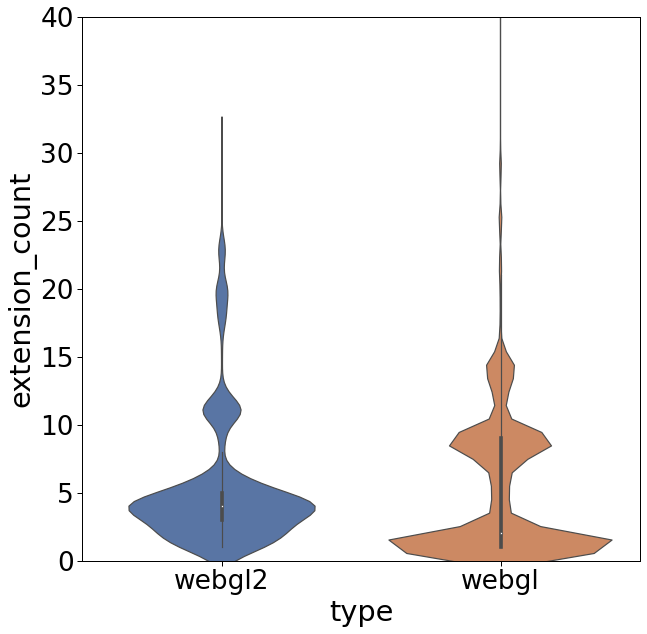

In [34]:
# show the distribution of extension_count of each context TYPE
plt.figure(figsize=(10, 10))
# sns.barplot(data=tmp, x="type", y="extension_count")
# sns.boxplot(data=tmp, x="type", y="extension_count")
sns.violinplot(data=tmp[tmp['extension_count'] > 0], x="type", y="extension_count")
plt.ylim(0, 40)

<Axes: xlabel='used extension', ylabel='type'>

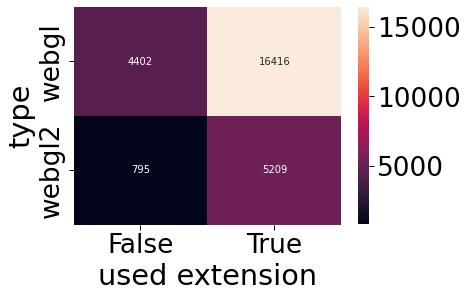

In [35]:
tmpa = tmp.copy()
tmpa['used extension'] = tmpa['extension_count'].apply(lambda x: x > 0)
sns.heatmap(tmpa.groupby(['type', 'used extension']).size().unstack(), annot=True, fmt='d')

In [36]:
df_ext = df_context_noraf[['frame.context.maghsk.extensions', 'frame.context.maghsk.createArguments.0', 'idx']].dropna()
df_ext = df_ext.rename(columns={'frame.context.maghsk.extensions': 'extensions', 'frame.context.maghsk.createArguments.0': 'type'})
df_ext['type'].replace({'experimental-webgl': 'webgl'}, inplace=True)
df_ext['extensions'] = df_ext['extensions'].apply(lambda x: list(set(x)))
df_ext

,extensions,type,idx
0,"[EXT_color_buffer_half_float, OES_texture_floa...",webgl2,0
1,[WEBGL_lose_context],webgl,2
2,[],webgl2,2
3,"[EXT_texture_filter_anisotropic, OES_texture_f...",webgl2,2
4,"[EXT_texture_filter_anisotropic, OES_texture_f...",webgl2,2
...,...,...,...
35031,[],webgl,29224
35032,[],webgl,29230
35033,"[OES_texture_float, OES_element_index_uint, OE...",webgl,29230
35034,"[EXT_disjoint_timer_query, OES_standard_deriva...",webgl,29235


In [39]:
def concatenate_unique(lst):
    return sorted(set([item for sublist in lst for item in sublist]))

In [41]:
df_ext = pd.DataFrame(df_ext.groupby('idx')['extensions'].apply(concatenate_unique), columns=['extensions'])

In [43]:
(df_ext.str.len() > 0).value_counts()

extensions
True     10504
False     1588
Name: count, dtype: int64

In [38]:
df_ext_e = df_ext.explode('extensions').dropna().reset_index(drop=False).rename(columns={'index': 'idx-context'})
df_ext_e['extensions'] = df_ext_e['extensions'].str.lower()
set(df_ext_e['extensions'].tolist())

{'angle_instanced_arrays',
 'ext_blend_minmax',
 'ext_color_buffer_float',
 'ext_color_buffer_float_linear',
 'ext_color_buffer_half_float',
 'ext_disjoint_timer_query',
 'ext_disjoint_timer_query_webgl2',
 'ext_draw_buffers',
 'ext_float_blend',
 'ext_frag_depth',
 'ext_multisampled_render_to_texture',
 'ext_polygon_offset_clamp',
 'ext_shader_texture_lod',
 'ext_srgb',
 'ext_texture_compression_bptc',
 'ext_texture_compression_rgtc',
 'ext_texture_filter_anisotropic',
 'ext_texture_norm16',
 'gl_img_texture_compression_pvrtc',
 'gl_oes_standard_derivatives',
 'img_texture_compression_pvrtc',
 'khr_parallel_shader_compile',
 'moz_angle_instanced_arrays',
 'moz_ext_blend_minmax',
 'moz_ext_color_buffer_half_float',
 'moz_ext_disjoint_timer_query',
 'moz_ext_srgb',
 'moz_ext_texture_filter_anisotropic',
 'moz_oes_standard_derivatives',
 'moz_oes_texture_half_float',
 'moz_oes_texture_half_float_linear',
 'moz_oes_vertex_array_object',
 'moz_webgl_color_buffer_float',
 'moz_webgl_compres

In [70]:
unsupported_extension_keywords = [
    '_bptc',
    '_pvrtc',
    '_rgtc',
    '_s3tc',
    # 'debug_renderer',
    'disjoint_timer_query',
    'lose_context',
    'multiview',
    'provoking_vertex'
]
df_ext['unsupported'] = df_ext['extensions'].apply(lambda exts: any([kwd in ext for kwd in unsupported_extension_keywords for ext in exts]))
df_ext.idx.nunique()

12092

In [71]:
df_ext[df_ext['unsupported'] == True].idx.nunique()

3158

In [72]:
df_ext[df_ext['unsupported'] == True].idx.nunique() / df_ext.idx.nunique()

0.2611644062189878

In [73]:
df_ext[df_ext['unsupported'] == True]

,extensions,type,idx,unsupported
1,[WEBGL_lose_context],webgl,2,True
10,[WEBGL_lose_context],webgl,15,True
15,"[EXT_color_buffer_half_float, EXT_texture_filt...",webgl2,17,True
16,"[WEBGL_debug_shaders, OES_element_index_uint, ...",webgl,20,True
24,"[OES_texture_float, OES_texture_half_float_lin...",webgl,21,True
...,...,...,...,...
35024,"[WEBGL_compressed_texture_astc, WEBGL_compress...",webgl,29219,True
35027,"[WEBGL_lose_context, WEBGL_debug_renderer_info]",webgl,29221,True
35028,[WEBGL_lose_context],webgl,29221,True
35034,"[WEBGL_debug_shaders, OES_element_index_uint, ...",webgl,29235,True


In [42]:
df_ext['unsupported'].value_counts()

unsupported
False    15794
True     11028
Name: count, dtype: int64

In [43]:
df_ext_e

,idx-context,extensions,type,idx
0,0,ext_color_buffer_float,webgl2,0
1,0,ext_color_buffer_half_float,webgl2,0
2,0,oes_texture_float_linear,webgl2,0
3,0,webgl_multisampled_render_to_texture,webgl2,0
4,1,webgl_lose_context,webgl,2
...,...,...,...,...
111415,35035,angle_instanced_arrays,webgl,29238
111416,35035,ext_texture_compression_bptc,webgl,29238
111417,35035,ext_blend_minmax,webgl,29238
111418,35035,oes_texture_float_linear,webgl,29238


In [44]:
for kwd in unsupported_extension_keywords:
    print(kwd, df_ext_e[df_ext_e.extensions.str.contains(kwd)].idx.nunique())

_bptc 475
_pvrtc 885
_rgtc 99
_s3tc 1661
debug_renderer 3284
disjoint_timer_query 738
lose_context 1602
multiview 260
provoking_vertex 68


### weird

In [45]:
df_weird = df_context_noraf.loc[df_context_noraf.index.isin(df_ext_e[df_ext_e['extensions'] == 'webgl_debug_renderer_info']['idx-context'])]

In [46]:
a = df_weird[[x for x in df_weird.columns if x.startswith('frame.context.maghsk.counter.funcCount')]].sum(axis=1)
print(len(a))

6098


In [47]:
print((a < 7).sum() / len(a))
print((a < 7).sum())

0.754181698917678
4599


In [48]:
print(df_weird['frame.context.maghsk.shaders'].str.len().value_counts())

frame.context.maghsk.shaders
0      5044
2       426
16       91
92       59
14       57
       ... 
110       1
58        1
296       1
15        1
146       1
Name: count, Length: 62, dtype: int64


In [49]:
print(df_weird[a<7]['frame.context.maghsk.shaders'].str.len().value_counts())

frame.context.maghsk.shaders
0    4599
Name: count, dtype: int64


In [50]:
df_ext_e.groupby('extensions').nunique().to_csv('extensions_usage.csv')
print(df_ext_e['idx-context'].nunique())

21625


In [51]:
df_ext_e[df_ext_e['extensions']=='ovr_multiview2']['idx-context'].nunique() / df_ext_e['idx-context'].nunique()

0.013364161849710983

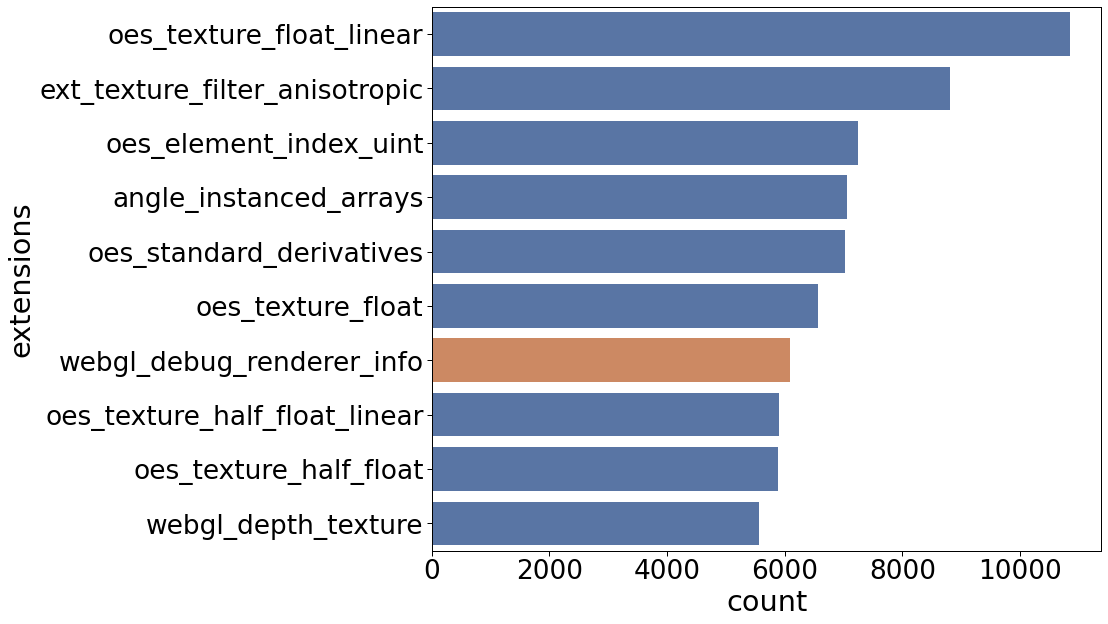

In [52]:
plt.figure(figsize=(12, 10))

# Get the top 20 values based on their counts
tmp = df_ext_e['extensions']
top_20 = tmp.value_counts().nlargest(10).sort_values(ascending=False)

# Create the count plot
sns.countplot(y=tmp[tmp.isin(top_20.index)], order=top_20.index, palette=[color_palette[0]]*6+[color_palette[1]]+[color_palette[0]]*3)
plt.savefig('fig/results_context_extensions.pdf', bbox_inches='tight')

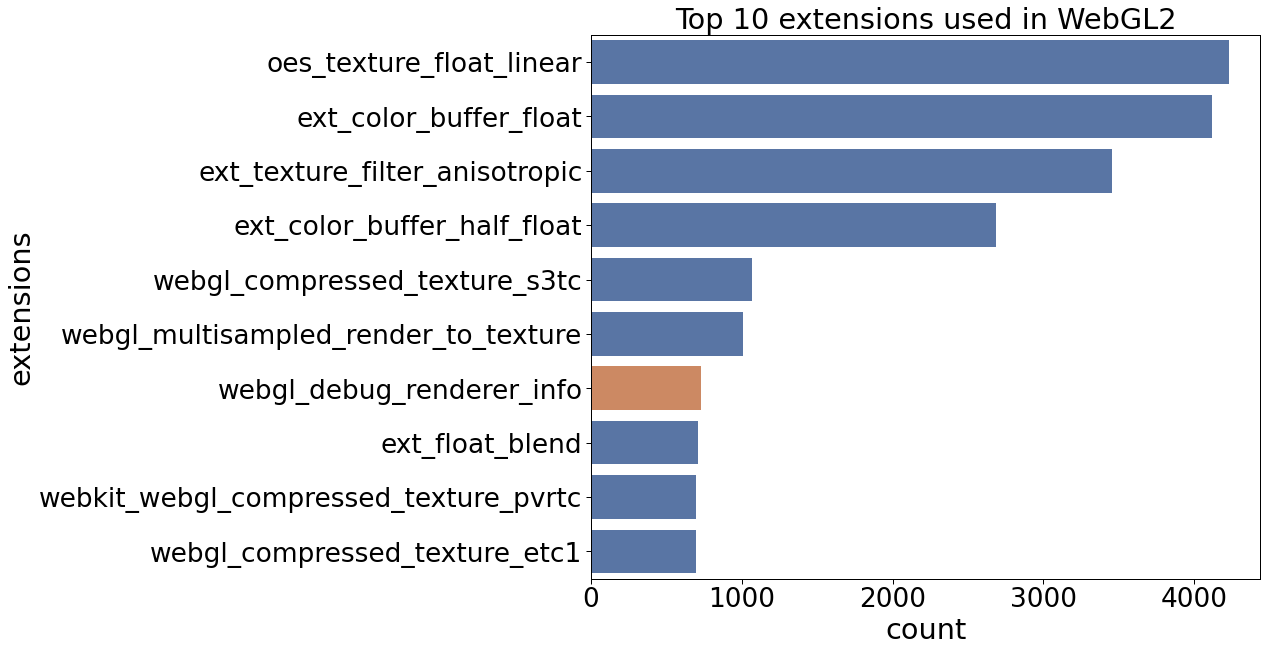

In [53]:
plt.figure(figsize=(12, 10))

tmp = df_ext_e[df_ext_e['type'] == 'webgl2']['extensions']
top_20 = tmp.value_counts().nlargest(10).sort_values(ascending=False)

# Create the count plot
sns.countplot(y=tmp[tmp.isin(top_20.index)], order=top_20.index, palette=[color_palette[0]]*6+[color_palette[1]]+[color_palette[0]]*3)
plt.title('Top 10 extensions used in WebGL2')
plt.savefig('fig/results_context_extensions.pdf', bbox_inches='tight')

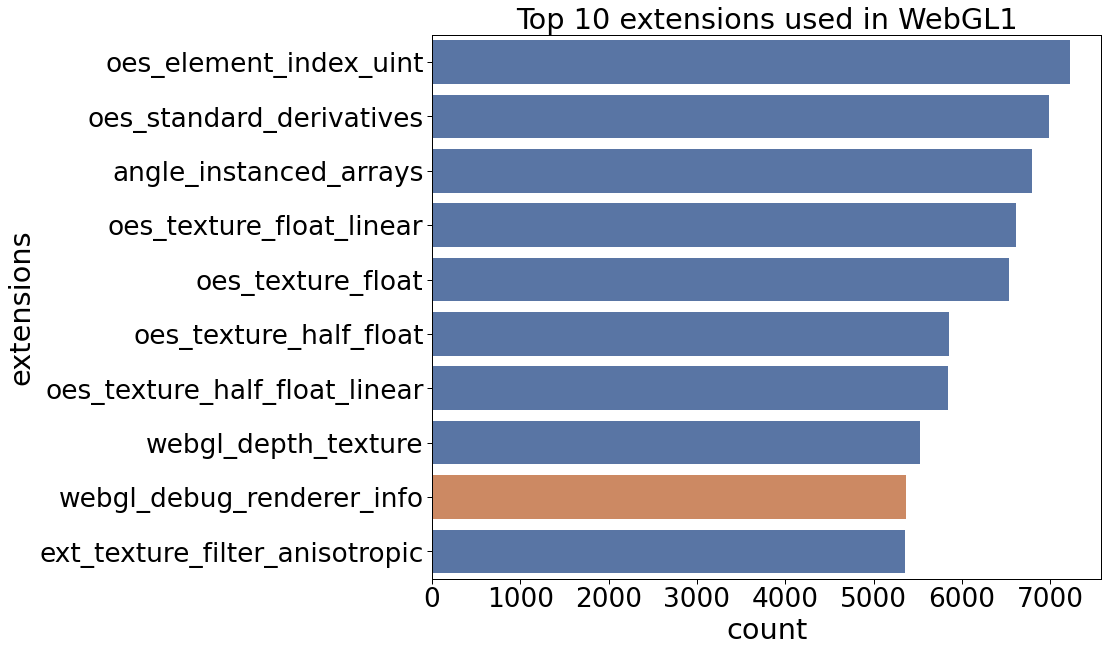

In [54]:
plt.figure(figsize=(12, 10))

tmp = df_ext_e[df_ext_e['type'] == 'webgl']['extensions']
top_20 = tmp.value_counts().nlargest(10).sort_values(ascending=False)

# Create the count plot
sns.countplot(y=tmp[tmp.isin(top_20.index)], order=top_20.index, palette=[color_palette[0]]*8+[color_palette[1]]+[color_palette[0]]*1)
plt.title('Top 10 extensions used in WebGL1')
plt.savefig('fig/results_context_extensions.pdf', bbox_inches='tight')

## Context Attributes & Create Arguments

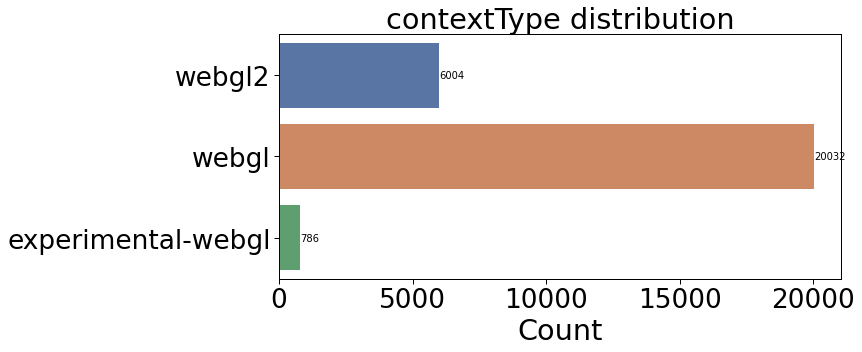

In [55]:
# df_context_noraf["frame.context.maghsk.createArguments.0"].value_counts()
fig, axes = plt.subplots(figsize=(12, 5))
sns.countplot(y="frame.context.maghsk.createArguments.0", data=df_context_noraf, ax=axes)
axes.set_xlabel('Count')
axes.set_ylabel('')
axes.set_title('contextType distribution')
for rect in axes.patches:
    axes.annotate(f'{rect.get_width():.0f}', (rect.get_width(), rect.get_y()+rect.get_height()/2), ha='left', va='center')
plt.tight_layout()
plt.savefig('fig/results_raf_contextType.pdf', bbox_inches='tight')

In [56]:
df_context_noraf.groupby('idx')["frame.context.maghsk.createArguments.0"].unique().explode().value_counts()

frame.context.maghsk.createArguments.0
webgl                 8811
webgl2                3970
experimental-webgl     606
Name: count, dtype: int64

In [57]:
df_context_noraf.columns.tolist()

['idx-frame',
 'idx',
 'category',
 'label_ERROR',
 'label_usecase',
 'label_interactions',
 'label_comments',
 'url',
 'date',
 'netIdleTimeout',
 'raf_path',
 'manual_interaction',
 'url_essential',
 'frame.url',
 'frame.title',
 'frame.date',
 'frame.when',
 'frame.counter.frames',
 'frame.counter.contextsNum',
 'frame.counter.usedWebGL',
 'frame.counter.usedOffScreenCanvas',
 'frame.context.canvasSize',
 'frame.context.canvasHidden',
 'frame.context.canvasContained',
 'frame.context.maghsk.createTime',
 'frame.context.maghsk.createArguments.0',
 'frame.context.maghsk.createArguments.1.alpha',
 'frame.context.maghsk.createArguments.1.depth',
 'frame.context.maghsk.createArguments.1.stencil',
 'frame.context.maghsk.createArguments.1.antialias',
 'frame.context.maghsk.createArguments.1.premultipliedAlpha',
 'frame.context.maghsk.createArguments.1.preserveDrawingBuffer',
 'frame.context.maghsk.createArguments.1.powerPreference',
 'frame.context.maghsk.createArguments.1.failIfMajorPerfo

In [58]:
df_context_noraf[df_context_noraf['frame.context.maghsk.createArguments.1.anialias'].notnull()]

,idx-frame,idx,category,label_ERROR,label_usecase,label_interactions,label_comments,url,date,netIdleTimeout,...,frame.context.maghsk.counter.textureTypes.DataView,frame.context.maghsk.createArguments.1.referrer,frame.context.maghsk.createArguments.1.useWebgl2,frame.context.maghsk.counter.textureTypes.,frame.context.maghsk.createArguments.1.dpi,frame.context.maghsk.createArguments.1.clearColor,frame.context.maghsk.counter.funcCount.getAttachedShaders,frame.context.maghsk.createArguments.1.adaptToDeviceRatio,frame.context.maghsk.createArguments.1.dnt,data source
1290,3969,1283,[bq],0,1,0,,http://mapping.tools/,1683356978193,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[HTTP Archive]


In [59]:
df_context_noraf[df_context_noraf['frame.context.maghsk.createArguments.1.failIfMajorPerformanceCaviet'].notnull()]

,idx-frame,idx,category,label_ERROR,label_usecase,label_interactions,label_comments,url,date,netIdleTimeout,...,frame.context.maghsk.counter.textureTypes.DataView,frame.context.maghsk.createArguments.1.referrer,frame.context.maghsk.createArguments.1.useWebgl2,frame.context.maghsk.counter.textureTypes.,frame.context.maghsk.createArguments.1.dpi,frame.context.maghsk.createArguments.1.clearColor,frame.context.maghsk.counter.funcCount.getAttachedShaders,frame.context.maghsk.createArguments.1.adaptToDeviceRatio,frame.context.maghsk.createArguments.1.dnt,data source
1960,6126,1945,[awwwards],0,1,0,,http://steveroach.eugjlee.com/home,1683358610152,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Crawling/Galleries]


In [60]:
df_context_noraf['frame.context.maghsk.createArguments.1.powerPreference'].fillna('not set').value_counts()

frame.context.maghsk.createArguments.1.powerPreference
not set             19595
default              4266
high-performance     2919
low-power              42
Name: count, dtype: int64

In [61]:
df_context_noraf[df_context_noraf['frame.context.maghsk.createArguments.1.powerPreference']=='low-power']

,idx-frame,idx,category,label_ERROR,label_usecase,label_interactions,label_comments,url,date,netIdleTimeout,...,frame.context.maghsk.counter.textureTypes.DataView,frame.context.maghsk.createArguments.1.referrer,frame.context.maghsk.createArguments.1.useWebgl2,frame.context.maghsk.counter.textureTypes.,frame.context.maghsk.createArguments.1.dpi,frame.context.maghsk.createArguments.1.clearColor,frame.context.maghsk.counter.funcCount.getAttachedShaders,frame.context.maghsk.createArguments.1.adaptToDeviceRatio,frame.context.maghsk.createArguments.1.dnt,data source
1044,3340,1083,[awwwards],0,1,0,,http://juicebrothers.at,1683356870295,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Crawling/Galleries]
1960,6126,1945,[awwwards],0,1,0,,http://steveroach.eugjlee.com/home,1683358610152,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Crawling/Galleries]
3874,13090,4107,[awwwards],0,1,0,,https://0x.se/,1683362546496,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Crawling/Galleries]
3875,13090,4107,[awwwards],0,1,0,,https://0x.se/,1683362546496,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Crawling/Galleries]
5023,17086,4982,[bq],0,1,0,,https://apiida.com/,1683364443696,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[HTTP Archive]
6885,22915,6611,[bq],0,1,1,,https://chatchatgame.netlify.app/,1684739658795,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[HTTP Archive]
12217,38126,10316,[awwwards],0,1,0,scroll,https://hytek.co.jp/,1683374316792,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Crawling/Galleries]
17785,54814,14138,[awwwards],0,1,0,,https://peaceprizelaureates.nobelpeacecenter.o...,1683381581287,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Crawling/Galleries]
18768,57284,14841,"[awwwards, cssdesign]",0,1,0,,https://quoitworks.com/,1683384394391,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Crawling/Galleries, Crawling/Galleries]"
18769,57284,14841,"[awwwards, cssdesign]",0,1,0,,https://quoitworks.com/,1683384394391,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Crawling/Galleries, Crawling/Galleries]"


In [62]:
create_arguments_columns_list = [
    "frame.context.maghsk.createArguments.0",
    'frame.context.maghsk.createArguments.1.alpha',
    'frame.context.maghsk.createArguments.1.antialias',
    'frame.context.maghsk.createArguments.1.depth',
    'frame.context.maghsk.createArguments.1.desynchronized',
    'frame.context.maghsk.createArguments.1.failIfMajorPerformanceCaveat',
    'frame.context.maghsk.createArguments.1.powerPreference',
    'frame.context.maghsk.createArguments.1.premultipliedAlpha',
    'frame.context.maghsk.createArguments.1.preserveDrawingBuffer',
    'frame.context.maghsk.createArguments.1.stencil',
    'frame.context.maghsk.createArguments.1.xrCompatible', ]
tmp = df_context_noraf[create_arguments_columns_list].fillna('not set').rename(columns={
    "frame.context.maghsk.createArguments.0": 'type',
    'frame.context.maghsk.createArguments.1.alpha': 'alpha',
    'frame.context.maghsk.createArguments.1.antialias': 'antialias',
    'frame.context.maghsk.createArguments.1.depth': 'depth',
    'frame.context.maghsk.createArguments.1.desynchronized': 'desynchronized',
    'frame.context.maghsk.createArguments.1.failIfMajorPerformanceCaveat': 'failIfMajorPerformanceCaveat',
    'frame.context.maghsk.createArguments.1.powerPreference': 'powerPreference',
    'frame.context.maghsk.createArguments.1.premultipliedAlpha': 'premultipliedAlpha',
    'frame.context.maghsk.createArguments.1.preserveDrawingBuffer': 'preserveDrawingBuffer',
    'frame.context.maghsk.createArguments.1.stencil': 'stencil',
    'frame.context.maghsk.createArguments.1.xrCompatible': 'xrCompatible',
})
tmp.type.replace({
    'webgl': 'webgl1',
    'experimental-webgl': 'webgl1',
}, inplace=True)

In [63]:
tmp.groupby('type').value_counts()

type    alpha    antialias  depth    desynchronized  failIfMajorPerformanceCaveat  powerPreference   premultipliedAlpha  preserveDrawingBuffer  stencil  xrCompatible
webgl1  not set  not set    not set  not set         not set                       not set           not set             not set                not set  not set         9020
        True     False      True     not set         not set                       not set           not set             not set                True     not set          974
        False    not set    True     not set         not set                       high-performance  not set             not set                True     not set          930
        not set  not set    not set  not set         True                          not set           not set             not set                True     not set          831
        True     True       True     not set         not set                       not set           True                False            

In [64]:
res = []
for t in ['webgl1', 'webgl2']:
    tmpa = tmp[tmp.type == t].drop(columns='type')
    results = [tmpa[col].value_counts(normalize=True) for col in tmpa.columns]
    results = pd.concat(results, axis=1)
    results.columns = tmpa.columns
    results.drop(['8', '', 8], inplace=True, errors='ignore')
    res.append(results)

In [65]:
total_context = len(tmp)
total_context

26822

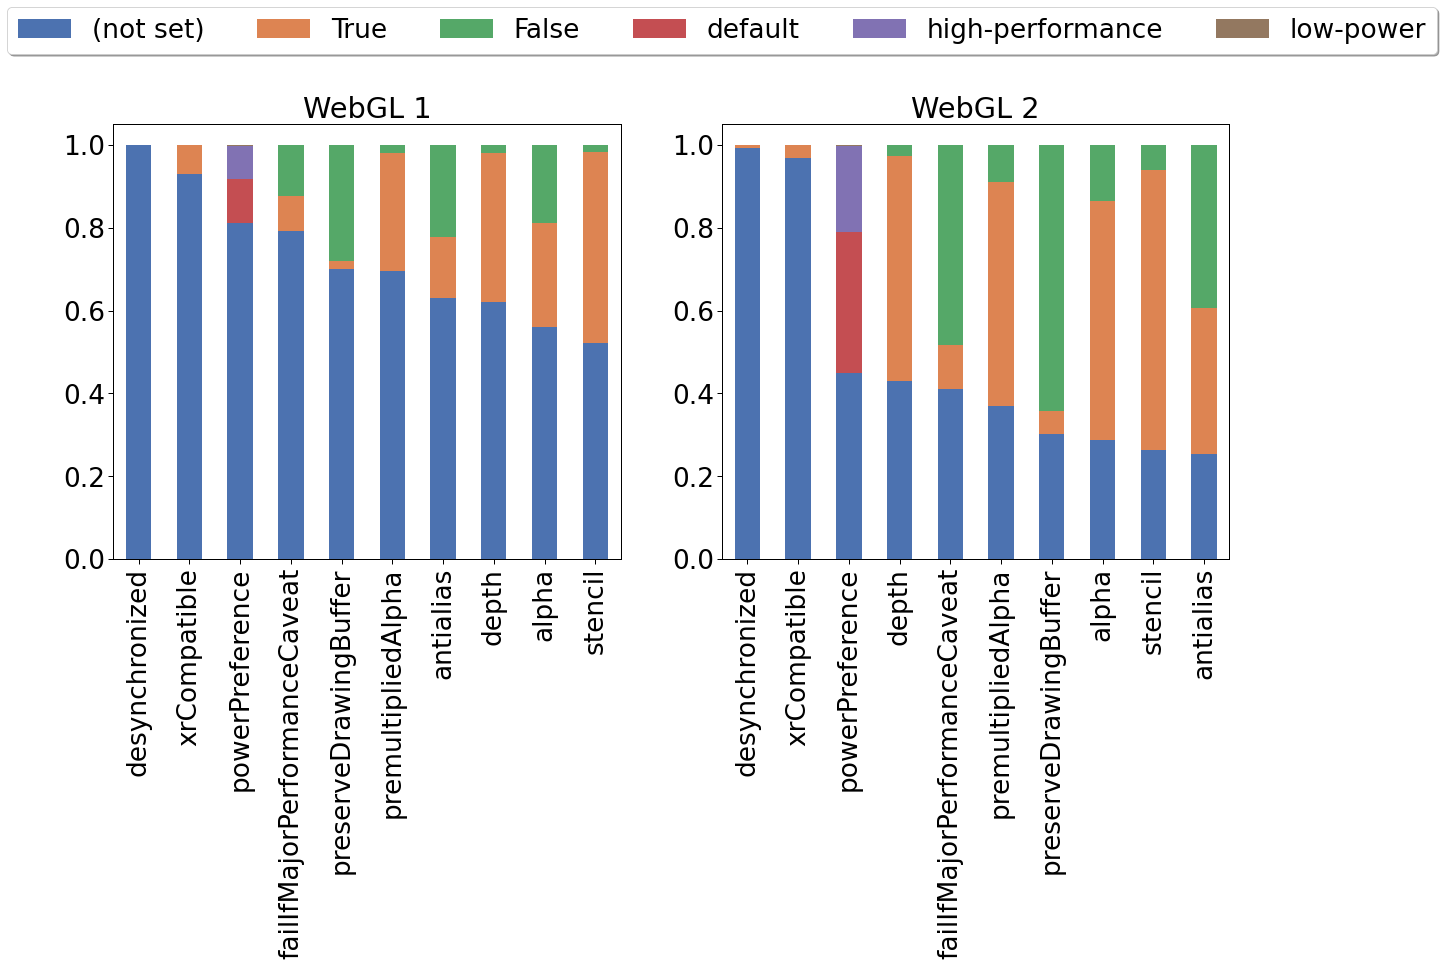

In [66]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))
# plot a stacked bar chart
for i, type in enumerate(['WebGL 1', 'WebGL 2']):
    res[i].T[['not set', True, False, 'default', 'high-performance', 'low-power']].sort_values(['not set'], ascending=False).plot(kind='bar', stacked=True, ax=ax[i], legend=False)
    ax[i].set_title(type)
# results.T.plot(kind='barh', stacked=True, figsize=(10, 8))
plt.legend(['(not set)', True, False, 'default', 'high-performance', 'low-power'], loc='upper center', bbox_to_anchor=(0.0, 1.3), ncol=6, fancybox=True, shadow=True)
# plt.yticks([0, 25, 50, 75, 100], ['0%', '25%', '50%', '75%', '100%'])
plt.savefig('fig/results_context_options.pdf', bbox_inches='tight')

array([<Axes: ylabel='powerPreference'>], dtype=object)

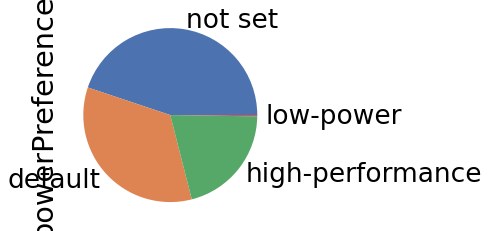

In [67]:
results[['powerPreference']].dropna().plot(kind='pie', subplots=True, legend=False)

In [68]:
# # plot a stacked bar chart
# results.drop(columns=['powerPreference', 'type']).T[['not set', True, False]].sort_values(['not set', True], ascending=False).plot(kind='barh', stacked=True, figsize=(12, 8))
# # results.T.plot(kind='barh', stacked=True, figsize=(10, 8))
# plt.legend(['not set', True, False], loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=3)
# # plt.yticks([0, 25, 50, 75, 100], ['0%', '25%', '50%', '75%', '100%'])
# plt.savefig('fig/results_context_options.pdf', bbox_inches='tight')